<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Week 2 - Part1)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the dataset (CO<sub>2</sub> emission data)

In the dataset, the CO<sub>2</sub> emission for various regions in the world is given. Our objective is to group the regions based on the factors affecting the environment in terms of the greenhouse gases, where CO<sub>2</sub> is a primary greenhouse gas. 

Many developing and developed countries in the world are contributing to the CO<sub>2</sub> emission in the environment. It is interesting to know that the increase in atmospheric carbon dioxide is responsible for about two-thirds of the total energy imbalance that is causing Earth's temperature to rise and leads to global warming.

**Region**: Region of the country

**CO2 Emission**: Annual CO<sub>2</sub> emission (in tonnes)

**Ease of Business**: The ease of business in the country

**Energy Usage**: Energy used by the country in various forms

**GDP**: GDP of a country

**Internet Usage**: Usage of the internet 

**Population total**: Total population of a country

## Table of Content

1. **[Exploratory Data Analysis](#lib)**
2. **[Hierarchical Clustering](#hie)**
3. **[DBSCAN](#DBSCAN)**

#### Import the required libraries

In [ ]:
# write your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
##for unsupervised model
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

##scipy for cluster
from scipy.cluster.hierarchy import linkage 
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet


#### Read the data

Load the csv file and print the first five observations.

In [ ]:
# write your code here
df_CO2Emission = pd.read_csv('/content/CO2_emission_data.csv')

In [ ]:
df_CO2Emission.head()

,Region,CO2 Emissions,Ease of Business,Energy Usage,GDP,Internet Usage,Population Total
0,Europe,4294,151,1976,5.652325e+09,0.010,3033659
1,Europe,4166,151,2172,7.464447e+09,0.024,3014579
2,Europe,4254,151,2172,8.376484e+09,0.060,2992724
3,Europe,3865,151,2068,9.132562e+09,0.096,2968028
4,Europe,4056,151,2025,1.070101e+10,0.150,2940880



### Let's begin with some hands-on practice exercises

<a id="lib"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Identify the different regions to which the countries belong and visualize the count of countries.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# write your code here
df_CO2Emission['Region'].unique()

array(['Europe', 'Africa', 'The Americas', 'Asia', 'Oceania',
       'Middle East'], dtype=object)

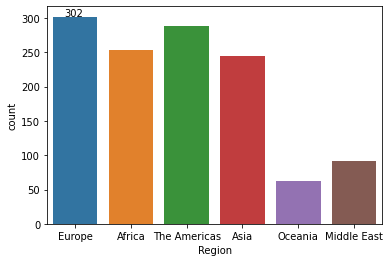

In [ ]:
sns.countplot(x=df_CO2Emission['Region'])
plt.text(x=-0.2, y =df_CO2Emission['Region'].value_counts()[0]+1, s=df_CO2Emission['Region'].value_counts()[0])
plt.show()


Interpretation : max_country count = Europian REgion and smallest count is from Oceania

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the datatype, dimension and summary statistics of the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# write your code here
df_CO2Emission.dtypes

Region               object
CO2 Emissions         int64
Ease of Business      int64
Energy Usage          int64
GDP                 float64
Internet Usage      float64
Population Total      int64
dtype: object

In [ ]:
df_CO2Emission.describe()
#df_CO2Emission.info()
#df_CO2Emission.shape

,CO2 Emissions,Ease of Business,Energy Usage,GDP,Internet Usage,Population Total
count,1.243000e+03,1243.000000,1.243000e+03,1.243000e+03,1236.000000,1.243000e+03
mean,1.897666e+05,88.279968,7.541842e+04,3.535548e+11,0.329983,4.513494e+07
std,7.697027e+05,52.770388,2.707586e+05,1.358970e+12,1.634042,1.600483e+08
min,4.800000e+01,1.000000,3.000000e+01,1.232585e+08,0.000000,6.966000e+04
25%,3.111500e+03,45.000000,2.721000e+03,7.746581e+09,0.062000,2.097088e+06
50%,1.620800e+04,85.000000,9.318000e+03,2.468037e+10,0.200500,7.739900e+06
75%,7.581200e+04,131.000000,3.495650e+04,1.770000e+11,0.460000,2.884664e+07
max,8.286892e+06,186.000000,2.727728e+06,1.620000e+13,57.000000,1.350695e+09


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Drop the variables 'Region', 'Ease of Business', 'Internet Usage'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# write your code here
#df_CO2Emission = df_CO2Emission.drop([ 'Region', 'Ease of Business', 'Internet Usage'], axis = 1)
df_CO2Emission.head()

,CO2 Emissions,Energy Usage,GDP,Population Total
0,4294,1976,5.652325e+09,3033659
1,4166,2172,7.464447e+09,3014579
2,4254,2172,8.376484e+09,2992724
3,3865,2068,9.132562e+09,2968028
4,4056,2025,1.070101e+10,2940880


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Check if there are missing values, if yes then remove the observations with missing values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# write your code here
df_CO2Emission.isnull().sum() # no missing values in dataset

CO2 Emissions       0
Energy Usage        0
GDP                 0
Population Total    0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Check if there are outliers in the data and visualize the outliers using a boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

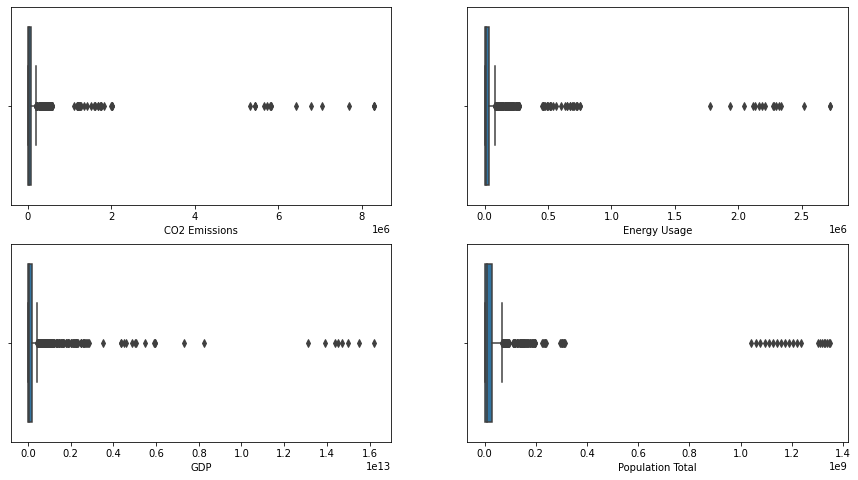

In [ ]:
from IPython.core.pylabtools import figsize
# write your code here
fig, ax = plt.subplots(nrows =2, ncols =2, figsize=(15,8))
for var, subplot in zip(df_CO2Emission.columns, ax.flatten()):
  sns.boxplot(df_CO2Emission[var], ax = subplot)

In [ ]:
#there are extreme outliers in each column

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Remove the outliers using 3.5IQR and check the shape of the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# write your code here
Q1 = df_CO2Emission.quantile(0.25)
Q3 = df_CO2Emission.quantile(0.75)

IQR = Q3 - Q1
lb = Q1 - 3.5 *IQR
ub = Q3 + 3.5 * IQR
df_CO2Emission = df_CO2Emission[~((df_CO2Emission< lb) | (df_CO2Emission>ub)).any(axis=1)]


In [ ]:
df_CO2Emission.shape

(1054, 4)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Visualize the data obtained after removing the outliers with the help of a boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

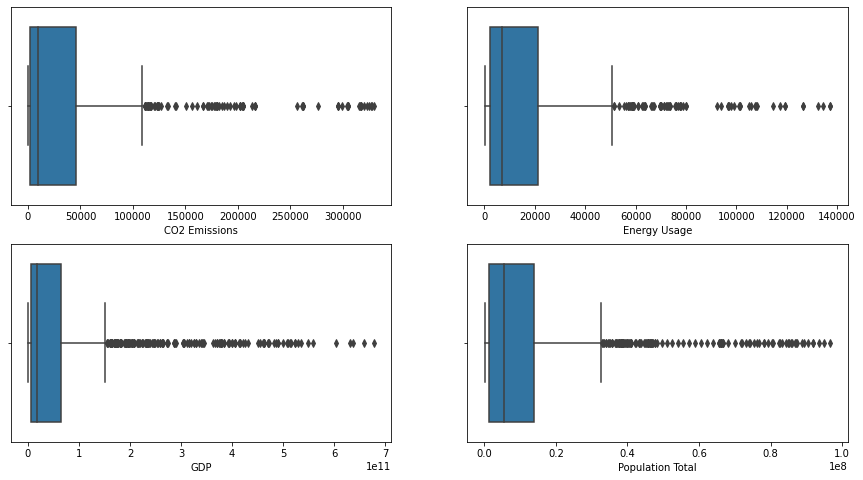

In [ ]:
# write your code here
from IPython.core.pylabtools import figsize
# write your code here
fig, ax = plt.subplots(nrows =2, ncols =2, figsize=(15,8))
for var, subplot in zip(df_CO2Emission.columns, ax.flatten()):
  sns.boxplot(df_CO2Emission[var], ax = subplot)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Transform the variables in the standard form such that they will have mean 0 and standard deviation 1 and get the summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# write your code here
copy_df = df_CO2Emission[['CO2 Emissions','Energy Usage', 'GDP', 'Population Total']]
scaler = StandardScaler()
scaled_df = scaler.fit_transform(copy_df)


In [ ]:
scaled_df = pd.DataFrame(scaled_df)
round(scaled_df.describe())

,0,1,2,3
count,1054.0,1054.0,1054.0,1054.0
mean,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0
min,-1.0,-1.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0
50%,-0.0,-0.0,-0.0,-0.0
75%,0.0,0.0,-0.0,0.0
max,5.0,5.0,5.0,5.0


<a id="hie"></a>
## 2. Hierarchical Clustering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the 'ward' linkage method and print the first 10 observations of the linkage matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# write your code here
link_matrix = linkage(scaled_df, method = 'ward')
print(link_matrix[0:10])

[[3.80000000e+02 3.82000000e+02 2.25694801e-05 2.00000000e+00]
 [3.91000000e+02 3.92000000e+02 3.78208913e-05 2.00000000e+00]
 [3.81000000e+02 3.83000000e+02 8.63012142e-05 2.00000000e+00]
 [3.60000000e+01 3.70000000e+01 8.78688205e-05 2.00000000e+00]
 [2.60000000e+01 2.70000000e+01 1.07365323e-04 2.00000000e+00]
 [4.95000000e+02 4.96000000e+02 1.19667619e-04 2.00000000e+00]
 [3.84000000e+02 3.85000000e+02 1.20059668e-04 2.00000000e+00]
 [8.16000000e+02 8.18000000e+02 1.41060028e-04 2.00000000e+00]
 [9.60000000e+02 9.61000000e+02 1.45534666e-04 2.00000000e+00]
 [3.89000000e+02 3.90000000e+02 1.48856642e-04 2.00000000e+00]]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Visualize the clusters obtained using dendrogram and find the optimal number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

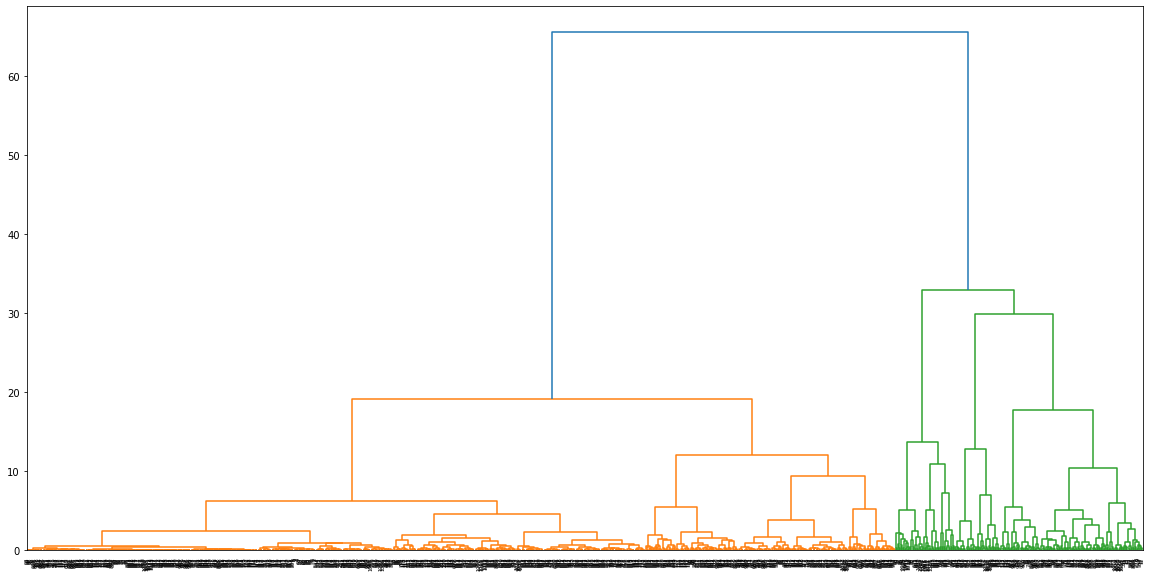

In [ ]:
# write your code here
plt.figure(figsize=(20,10))
dendro = dendrogram(link_matrix)

plt.show()

In [ ]:
dendro.keys()

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list', 'leaves_color_list'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the cophenetic correlation coefficient and interpret it.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# write your code here
eclu_dis = euclidean_distances(scaled_df)
## convert into an array either a lower diagnoal or upper diagonal values
dist_array = eclu_dis[np.triu_indices(1054,k=1)]
coeff, cophenet_dist = cophenet(link_matrix, dist_array)

In [ ]:
coeff # 2 cluster dendrogram is well separated 

0.7973822617121825

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Instantiate clustering method with an optimal number of clusters and 'ward' linkage method.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# write your code here
clust = AgglomerativeClustering(n_clusters=2, linkage = 'ward')
clust.fit(scaled_df)


AgglomerativeClustering()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Obtain the cluster labels and add a column containing the cluster number to the original data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# write your code here
df_CO2Emission['Cluster']=clust.labels_

In [ ]:
df_CO2Emission.head()

,CO2 Emissions,Energy Usage,GDP,Population Total,Cluster
0,4294,1976,5.652325e+09,3033659,1
1,4166,2172,7.464447e+09,3014579,1
2,4254,2172,8.376484e+09,2992724,1
3,3865,2068,9.132562e+09,2968028,1
4,4056,2025,1.070101e+10,2940880,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the size of each cluster and plot the count plot for the cluster size.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# write your code here
df_CO2Emission.Cluster.value_counts()

1    820
0    234
Name: Cluster, dtype: int64

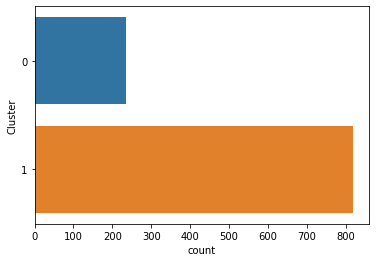

In [ ]:
sns.countplot(data = df_CO2Emission, y = 'Cluster')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Plot the scatterplot to visualize the clusters using 'CO2 Emissions' and 'Energy Usage'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

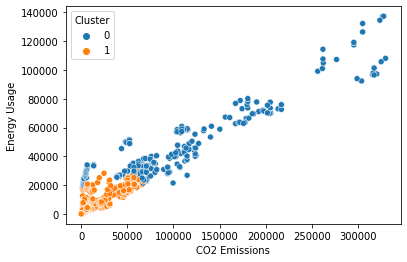

In [ ]:
# write your code here
sns.scatterplot(x= 'CO2 Emissions' , y ='Energy Usage', data = df_CO2Emission, hue = 'Cluster')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Obtain the first 10 observations for 1st cluster and find its summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# write your code here
df_CO2Emission[df_CO2Emission['Cluster']==1].head(10)

,CO2 Emissions,Energy Usage,GDP,Population Total,Cluster
0,4294,1976,5.652325e+09,3033659,1
1,4166,2172,7.464447e+09,3014579,1
2,4254,2172,8.376484e+09,2992724,1
3,3865,2068,9.132562e+09,2968028,1
4,4056,2025,1.070101e+10,2940880,1
5,4129,2061,1.288135e+10,2912559,1
6,3880,2068,1.204421e+10,2884303,1
7,4283,2059,1.192695e+10,2856673,1
18,9065,9004,1.418895e+10,15421075,1
19,18793,9676,1.964086e+10,15976715,1


In [ ]:
df_CO2Emission[df_CO2Emission['Cluster']==1].describe()

,CO2 Emissions,Energy Usage,GDP,Population Total,Cluster
count,820.000000,820.000000,8.200000e+02,8.200000e+02,820.0
mean,12706.826829,6355.904878,2.261635e+10,6.981027e+06,1.0
std,15888.052856,6865.604551,3.244548e+10,9.259193e+06,0.0
min,48.000000,30.000000,1.232585e+08,6.966000e+04,1.0
25%,1503.000000,758.500000,3.407603e+09,7.656738e+05,1.0
50%,5865.500000,3917.000000,1.147868e+10,3.684119e+06,1.0
75%,18806.000000,9156.250000,2.614448e+10,9.407482e+06,1.0
max,67242.000000,29501.000000,2.030000e+11,5.248729e+07,1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Obtain the first 10 observations for the 2nd cluster and find its summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# write your code here
df_CO2Emission[df_CO2Emission['Cluster']==0].head(10)

,CO2 Emissions,Energy Usage,GDP,Population Total,Cluster
8,92533,30698,6.786383e+10,33003442,0
9,89493,30974,8.532500e+10,33461345,0
10,107128,32335,1.030000e+11,33960903,0
11,103963,34658,1.170000e+11,34507214,0
12,112339,36793,1.350000e+11,35097043,0
13,114619,37425,1.710000e+11,35725377,0
14,124586,40823,1.370000e+11,36383302,0
15,123475,40105,1.610000e+11,37062820,0
16,123475,41852,1.990000e+11,37762962,0
17,123475,41852,2.040000e+11,38481705,0


In [ ]:
df_CO2Emission[df_CO2Emission['Cluster']==0].describe()

,CO2 Emissions,Energy Usage,GDP,Population Total,Cluster
count,234.000000,234.000000,2.340000e+02,2.340000e+02,234.0
mean,114965.598291,49870.944444,2.367197e+11,3.243600e+07,0.0
std,83140.404911,26678.211790,1.530802e+11,2.677078e+07,0.0
min,2226.000000,19971.000000,7.707035e+09,1.359114e+06,0.0
25%,63767.500000,30598.250000,1.300000e+11,9.097402e+06,0.0
50%,95160.500000,39972.500000,2.050000e+11,2.751649e+07,0.0
75%,159756.500000,62885.750000,3.415000e+11,4.585367e+07,0.0
max,329605.000000,137343.000000,6.780000e+11,9.670676e+07,0.0
